## This notebook assumes you have the following packages installed in your conda environment.

In [170]:
import pandas as pd
import json
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import randomcolor

In [172]:
df_default = pd.read_csv('../data/generated-data/default-nd.csv')
df_default.shape


(2723, 193)

In [173]:
df_default

,EntryID,LemmaID,Code,Batch,List,Item,YouTube Video,VimeoVideoHTML,VimeoVideo,SignFrequency(M),...,Iconicity(SD),Iconicity(N),Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,SignBankAnnotationID,SignBankEnglishTranslations,SignBankLemmaID,SignBankSemanticField,SignBankID,Neighborhood Density
0,1_dollar,1_dollar,C_02_025,C,2.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345587917,3.034,...,0.267,27.0,383,0,DOLLAR,"bill, cash, dollar, money",1_DOLLAR,None,1268.0,0
1,5_dollars,5_dollars,B_01_062,B,1.0,62.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/344...,https://player.vimeo.com/video/344399314,5.120,...,1.503,27.0,190,4,FIVE-DOLLARS,"dollar, five dollars, money",5_DOLLAR,Number,2436.0,5
2,8_hour,8_hour,C_02_055,C,2.0,55.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345588916,4.267,...,1.623,26.0,129,0,EIGHT-HOURSneut,"eight hours, 8 hours, hour, time",NUMBER-HOURS,Number,2437.0,0
3,9_oclock,9_oclock,C_02_080,C,2.0,80.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345589804,4.133,...,1.430,27.0,48,4,OCLOCK-NINE,"9:00, 9 o'clock, nine o'clock, o'clock, time",OCLOCK-NUMBER,None,2857.0,2
4,a-line_bob,a-line_bob,K_03_127,NaN,NaN,NaN,NaN,<iframe src=https://player.vimeo.com/video/342...,https://player.vimeo.com/video/342308099,4.273,...,1.925,26.0,158,4,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,zero,zero,D_03_036,D,3.0,36.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345983725,4.192,...,1.161,23.0,482,5,ZERO,"0, none, number, zero, zilch",ZERO,Number,1478.0,6
2719,zipper,zipper,D_01_034,D,1.0,34.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345804301,3.148,...,1.029,33.0,165,0,ZIPPER,"coat, jacket, zipper",ZIPPER,None,94.0,0
2720,zoo,zoo,E_03_042,E3,3.0,42.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346067693,3.533,...,1.729,30.0,137,3,NaN,NaN,NaN,NaN,NaN,3
2721,zoom_in,zoom_in,B_02_056,B,2.0,56.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345555455,3.958,...,2.187,30.0,524,0,ZOOM-IN,"computer screen, enlarge, expand, make bigger,...",ZOOM-IN,Event,3114.0,0


In [174]:
df_sign = pd.read_csv('../data/signdata.csv')
df_sign.shape

(2723, 192)

In [175]:
df_sign

,EntryID,LemmaID,Code,Batch,List,Item,YouTube Video,VimeoVideoHTML,VimeoVideo,SignFrequency(M),...,Iconicity(M),Iconicity(SD),Iconicity(N),Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,SignBankAnnotationID,SignBankEnglishTranslations,SignBankLemmaID,SignBankSemanticField,SignBankID
0,1_dollar,1_dollar,C_02_025,C,2.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345587917,3.034,...,1.074,0.267,27.0,383,0,DOLLAR,"bill, cash, dollar, money",1_DOLLAR,None,1268.0
1,5_dollars,5_dollars,B_01_062,B,1.0,62.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/344...,https://player.vimeo.com/video/344399314,5.120,...,5.481,1.503,27.0,190,4,FIVE-DOLLARS,"dollar, five dollars, money",5_DOLLAR,Number,2436.0
2,8_hour,8_hour,C_02_055,C,2.0,55.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345588916,4.267,...,2.654,1.623,26.0,129,0,EIGHT-HOURSneut,"eight hours, 8 hours, hour, time",NUMBER-HOURS,Number,2437.0
3,9_oclock,9_oclock,C_02_080,C,2.0,80.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345589804,4.133,...,2.741,1.430,27.0,48,4,OCLOCK-NINE,"9:00, 9 o'clock, nine o'clock, o'clock, time",OCLOCK-NUMBER,None,2857.0
4,a-line_bob,a-line_bob,K_03_127,NaN,NaN,NaN,NaN,<iframe src=https://player.vimeo.com/video/342...,https://player.vimeo.com/video/342308099,4.273,...,3.769,1.925,26.0,158,4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,zero,zero,D_03_036,D,3.0,36.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345983725,4.192,...,6.565,1.161,23.0,482,5,ZERO,"0, none, number, zero, zilch",ZERO,Number,1478.0
2719,zipper,zipper,D_01_034,D,1.0,34.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345804301,3.148,...,6.394,1.029,33.0,165,0,ZIPPER,"coat, jacket, zipper",ZIPPER,None,94.0
2720,zoo,zoo,E_03_042,E3,3.0,42.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346067693,3.533,...,2.100,1.729,30.0,137,3,NaN,NaN,NaN,NaN,NaN
2721,zoom_in,zoom_in,B_02_056,B,2.0,56.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345555455,3.958,...,4.667,2.187,30.0,524,0,ZOOM-IN,"computer screen, enlarge, expand, make bigger,...",ZOOM-IN,Event,3114.0


In [176]:
df_sign['SignBankEnglishTranslations'].value_counts()

cry out, shout, scream, yell                                                    4
canine, dog, puppy                                                              4
clip, cut, scissors, snip, trim                                                 3
especially, except, special, unique                                             3
chaos, chaotic, disrupt, hectic, mess, messed up, mess up, messy, thrown off    3
                                                                               ..
call, call-tty, phone, TDD, telephone, to call on a TTY, TTY                    1
grammar, grammatical                                                            1
heaven, the sky above                                                           1
line, line of people, to line up, queue                                         1
association, group, initialized, organization, organize                         1
Name: SignBankEnglishTranslations, Length: 1803, dtype: int64

In [177]:
df_default["Code"].values

array(['C_02_025', 'B_01_062', 'C_02_055', ..., 'E_03_042', 'B_02_056',
       'D_01_057'], dtype=object)

## Community Analysis

In [178]:
edges_df = pd.read_csv('../generated-data/default-neighbors.csv')
edges_df = edges_df.rename(columns={"neighbor": "source"})
edges_df.head()


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_03_044,C_01_085,11,"Flexion.2.0, FlexionChange.2.0, ThumbPosition....",1,SelectedFingers.2.0
1,A_03_047,B_02_038,9,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,SecondMinorLocation.2.0
2,B_01_059,G_01_064,8,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,Movement.2.0
3,B_02_024,J_03_068,7,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,Movement.2.0
4,B_02_038,A_03_047,9,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,SecondMinorLocation.2.0


In [179]:
edges_df.shape

(44, 6)

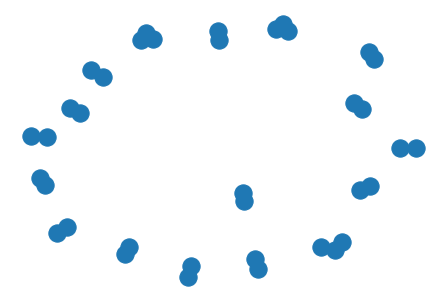

In [180]:
g = nx.from_pandas_edgelist(edges_df, source='source', target='target') 
nx.draw(g)

In [181]:
#first compute the best partition
# from community import greedy_modularity_communities
import community
G = g

#Two methods for community analysis
c = greedy_modularity_communities(G)
partition = community.best_partition(G)

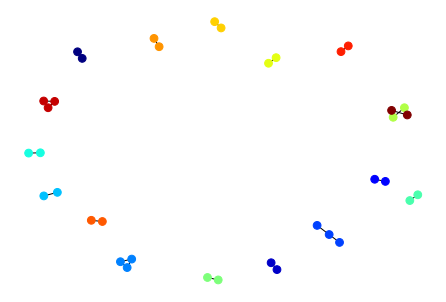

In [182]:
values = [partition.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=60, with_labels=False)

In [183]:
num_nodes = 0
for community in c:
    num_nodes += len(community)
print(num_nodes)

37


In [184]:
len(partition)

37

In [185]:
#Noes only connected by edges. Does not include standalone nodes.

list = partition.items()
print(len(list))
df_with_groupids = pd.DataFrame(list, columns=['Code', 'group_id'])
df_with_groupids.head()

37


,Code,group_id
0,C_01_085,0
1,A_03_044,0
2,B_02_038,1
3,A_03_047,1
4,G_01_064,2


In [186]:
# get edges only where source and target nodes belong to a valid community for now. This is to assign them group ids.
nodes_in_communities = df_with_groupids['Code'].unique()
edges_for_community_nodes_df = edges_df.loc[edges_df['source'].isin(nodes_in_communities) & edges_df['target'].isin(nodes_in_communities)]
print(len(edges_for_community_nodes_df['source'].unique()))
print(edges_df.shape)
print(edges_for_community_nodes_df.shape)
edges_for_community_nodes_df.head()

37
(44, 6)
(44, 6)


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_03_044,C_01_085,11,"Flexion.2.0, FlexionChange.2.0, ThumbPosition....",1,SelectedFingers.2.0
1,A_03_047,B_02_038,9,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,SecondMinorLocation.2.0
2,B_01_059,G_01_064,8,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,Movement.2.0
3,B_02_024,J_03_068,7,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,Movement.2.0
4,B_02_038,A_03_047,9,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,SecondMinorLocation.2.0


In [187]:

df_merged = pd.merge(df_default, df_with_groupids,how='left', on=['Code'])
print(df_merged.shape)
# print(df_merged.columns.values)
df_merged.head(20)

(2723, 194)


,EntryID,LemmaID,Code,Batch,List,Item,YouTube Video,VimeoVideoHTML,VimeoVideo,SignFrequency(M),...,Iconicity(N),Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,SignBankAnnotationID,SignBankEnglishTranslations,SignBankLemmaID,SignBankSemanticField,SignBankID,Neighborhood Density,group_id
0,1_dollar,1_dollar,C_02_025,C,2.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345587917,3.034,...,27.0,383,0,DOLLAR,"bill, cash, dollar, money",1_DOLLAR,None,1268.0,0,NaN
1,5_dollars,5_dollars,B_01_062,B,1.0,62.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/344...,https://player.vimeo.com/video/344399314,5.120,...,27.0,190,4,FIVE-DOLLARS,"dollar, five dollars, money",5_DOLLAR,Number,2436.0,5,NaN
2,8_hour,8_hour,C_02_055,C,2.0,55.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345588916,4.267,...,26.0,129,0,EIGHT-HOURSneut,"eight hours, 8 hours, hour, time",NUMBER-HOURS,Number,2437.0,0,NaN
3,9_oclock,9_oclock,C_02_080,C,2.0,80.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345589804,4.133,...,27.0,48,4,OCLOCK-NINE,"9:00, 9 o'clock, nine o'clock, o'clock, time",OCLOCK-NUMBER,None,2857.0,2,NaN
4,a-line_bob,a-line_bob,K_03_127,NaN,NaN,NaN,NaN,<iframe src=https://player.vimeo.com/video/342...,https://player.vimeo.com/video/342308099,4.273,...,26.0,158,4,NaN,NaN,NaN,NaN,NaN,3,NaN
5,a_little_bit,a_little_bit,H_03_025,H,3.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346887448,2.963,...,24.0,144,3,A-LITTLE-BIT,"a little bit, little, few, minimal, scarce",A-LITTLE-BIT,Attribute,0.0,3,NaN
6,abbreviate,abbreviate,G_01_040,G1,1.0,40.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346610443,5.444,...,27.0,368,1,SHORT,"brief, for a short time, quick, short, shortly",SHORT,Attribute,252.0,1,NaN
7,about_1,about,B_02_072,B,2.0,72.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345555837,5.480,...,30.0,129,2,ABOUTix,"about, regarding, with reference to",ABOUT,Locative,2043.0,1,NaN
8,about_2,about,B_02_003,B,2.0,3.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345536316,3.522,...,30.0,129,0,ABOUTb,"about, regarding, with reference to",ABOUT,Locative,2042.0,0,NaN
9,absolutely_nothing,absolutely_nothing,J_01_027,J,1.0,27.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346914407,2.957,...,24.0,232,3,ABSOLUTELY-NOTHING,"absolutely nothing, all out, depleted, empty, ...",ABSOLUTELY-NOTHING,Attribute,2044.0,4,NaN


In [188]:
values = {'group_id': 1000}
df_merged = df_merged.fillna(value=values)

print(df_merged['group_id'])
unique_community_ids = df_merged['group_id'].unique()
unique_community_ids

0       1000.0
1       1000.0
2       1000.0
3       1000.0
4       1000.0
         ...  
2718    1000.0
2719    1000.0
2720    1000.0
2721    1000.0
2722    1000.0
Name: group_id, Length: 2723, dtype: float64


array([1000.,    0.,    1.,   14.,    6.,    7.,   15.,    5.,    8.,
          3.,   13.,    4.,   11.,    2.,   16.,   12.,   10.,    9.])

In [189]:

#Will assign all NaN's same color for now. That's okay.


import random
 
def colors(n):
    if(n == 0):
        n = 600
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    
    step = 256 / n
#     print(n,r,g,b,step)

    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    
    colorstr = str(r)+","+str(b)+"," + str(g)
    return '#%02x%02x%02x' % (r, g, b)

color_dict = []
color_dictionary = {}
for groupid in unique_community_ids:
    #generate a random color
    color = colors(groupid)
    if(groupid == 1000):        
        color_dict.append({'group_id': 1000, 'color_code': color})
        color_dictionary['island'] = color
    else:        
        color_dict.append({'group_id':groupid , 'color_code': color})
        color_dictionary[str(int(groupid))] = color
    
color_dict

[{'group_id': 1000, 'color_code': '#6f8c42'},
 {'group_id': 0.0, 'color_code': '#b215f1'},
 {'group_id': 1.0, 'color_code': '#ed9ab6'},
 {'group_id': 14.0, 'color_code': '#5673f6'},
 {'group_id': 6.0, 'color_code': '#8198e8'},
 {'group_id': 7.0, 'color_code': '#3109bf'},
 {'group_id': 15.0, 'color_code': '#e44330'},
 {'group_id': 5.0, 'color_code': '#ba7f70'},
 {'group_id': 8.0, 'color_code': '#3fdd1f'},
 {'group_id': 3.0, 'color_code': '#c50966'},
 {'group_id': 13.0, 'color_code': '#8fdfa8'},
 {'group_id': 4.0, 'color_code': '#616e73'},
 {'group_id': 11.0, 'color_code': '#a07398'},
 {'group_id': 2.0, 'color_code': '#3efb14'},
 {'group_id': 16.0, 'color_code': '#bf1b79'},
 {'group_id': 12.0, 'color_code': '#b54f0a'},
 {'group_id': 10.0, 'color_code': '#8dfd2b'},
 {'group_id': 9.0, 'color_code': '#c1f9b9'}]

In [190]:
from IPython.display import Markdown
for color in color_dict:
    display (Markdown('<br><span style="color:' +color['color_code']+ '">Sample</span>.'))
    


<br><span style="color:#6f8c42">Sample</span>.

<br><span style="color:#b215f1">Sample</span>.

<br><span style="color:#ed9ab6">Sample</span>.

<br><span style="color:#5673f6">Sample</span>.

<br><span style="color:#8198e8">Sample</span>.

<br><span style="color:#3109bf">Sample</span>.

<br><span style="color:#e44330">Sample</span>.

<br><span style="color:#ba7f70">Sample</span>.

<br><span style="color:#3fdd1f">Sample</span>.

<br><span style="color:#c50966">Sample</span>.

<br><span style="color:#8fdfa8">Sample</span>.

<br><span style="color:#616e73">Sample</span>.

<br><span style="color:#a07398">Sample</span>.

<br><span style="color:#3efb14">Sample</span>.

<br><span style="color:#bf1b79">Sample</span>.

<br><span style="color:#b54f0a">Sample</span>.

<br><span style="color:#8dfd2b">Sample</span>.

<br><span style="color:#c1f9b9">Sample</span>.

In [191]:
color_df = pd.DataFrame(color_dict)
df_merged_with_color = pd.merge(df_merged, color_df,how='left', on=['group_id'])
print(df_merged_with_color.shape)
df_merged_with_color.head()


(2723, 195)


,EntryID,LemmaID,Code,Batch,List,Item,YouTube Video,VimeoVideoHTML,VimeoVideo,SignFrequency(M),...,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,SignBankAnnotationID,SignBankEnglishTranslations,SignBankLemmaID,SignBankSemanticField,SignBankID,Neighborhood Density,group_id,color_code
0,1_dollar,1_dollar,C_02_025,C,2.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345587917,3.034,...,383,0,DOLLAR,"bill, cash, dollar, money",1_DOLLAR,None,1268.0,0,1000.0,#6f8c42
1,5_dollars,5_dollars,B_01_062,B,1.0,62.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/344...,https://player.vimeo.com/video/344399314,5.120,...,190,4,FIVE-DOLLARS,"dollar, five dollars, money",5_DOLLAR,Number,2436.0,5,1000.0,#6f8c42
2,8_hour,8_hour,C_02_055,C,2.0,55.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345588916,4.267,...,129,0,EIGHT-HOURSneut,"eight hours, 8 hours, hour, time",NUMBER-HOURS,Number,2437.0,0,1000.0,#6f8c42
3,9_oclock,9_oclock,C_02_080,C,2.0,80.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345589804,4.133,...,48,4,OCLOCK-NINE,"9:00, 9 o'clock, nine o'clock, o'clock, time",OCLOCK-NUMBER,None,2857.0,2,1000.0,#6f8c42
4,a-line_bob,a-line_bob,K_03_127,NaN,NaN,NaN,NaN,<iframe src=https://player.vimeo.com/video/342...,https://player.vimeo.com/video/342308099,4.273,...,158,4,NaN,NaN,NaN,NaN,NaN,3,1000.0,#6f8c42


In [192]:
df_merged_with_color.shape

(2723, 195)

In [193]:
#Need only 5 columns for now for the graph file
df_node_graph_json_data = df_merged_with_color[["EntryID", "Code", "group_id", "color_code", "SignFrequency(Z)"]]
print(df_node_graph_json_data.shape)
df_node_graph_json_data.head(20)


(2723, 5)


,EntryID,Code,group_id,color_code,SignFrequency(Z)
0,1_dollar,C_02_025,1000.0,#6f8c42,-0.728
1,5_dollars,B_01_062,1000.0,#6f8c42,0.302
2,8_hour,C_02_055,1000.0,#6f8c42,-0.025
3,9_oclock,C_02_080,1000.0,#6f8c42,-0.122
4,a-line_bob,K_03_127,1000.0,#6f8c42,0.030
5,a_little_bit,H_03_025,1000.0,#6f8c42,-0.762
6,abbreviate,G_01_040,1000.0,#6f8c42,0.669
7,about_1,B_02_072,1000.0,#6f8c42,0.523
8,about_2,B_02_003,1000.0,#6f8c42,-0.762
9,absolutely_nothing,J_01_027,1000.0,#6f8c42,-0.686


In [194]:
edges_df.head()

,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_03_044,C_01_085,11,"Flexion.2.0, FlexionChange.2.0, ThumbPosition....",1,SelectedFingers.2.0
1,A_03_047,B_02_038,9,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,SecondMinorLocation.2.0
2,B_01_059,G_01_064,8,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,Movement.2.0
3,B_02_024,J_03_068,7,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,Movement.2.0
4,B_02_038,A_03_047,9,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,SecondMinorLocation.2.0


In [195]:
not_need_edge_cols = ['num_matched_features', 'matched_features', 'num_missed_features', 'missed_features']
links_df = edges_df.drop(columns=not_need_edge_cols)
links_df.head()

,target,source
0,A_03_044,C_01_085
1,A_03_047,B_02_038
2,B_01_059,G_01_064
3,B_02_024,J_03_068
4,B_02_038,A_03_047


In [196]:
edges_json_str = links_df.to_json(orient="records")
edges_json = json.loads(edges_json_str)
edges_json[0]

{'target': 'A_03_044', 'source': 'C_01_085'}

In [203]:
cols_not_in_sign_pane = ["LemmaID","Code","SignFrequency(SD)","SignFrequency(Z)","SignFrequency(N)","SignFrequency(M-Native)","SignFrequency(SD-Native)","SignFreq(Z-native)","SignFrequency(N-Native)","PercentUnknown(Native)","PercentGlossAgreement(Native)","SignFrequency(M-Nonnative)","SignFrequency(SD-Nonnative)","SignFreq(Z-Nonnative)","SignFrequency(N-Nonnative)","PercentUnknown(Nonnative)","PercentGlossAgreement(Nonnative)","Iconicity(SD)","Iconicity(Z)","Iconicity(N)","Iconicity_ID","D.Iconicity(M) all","D.Iconicity(SD) all","D.Iconicity(Z) all","D.Iconicity(N) all","D.Iconicity(M) native","D.Iconicity(SD) native","D.Iconicity(Z) native","D.Iconicity(N) native","Transparency SD","Transparency Z","SignOnset(ms)","SignOffset(ms)","SignType 1.0","MajorLocation 1.0","MinorLocation 1.0","SelectedFingers 1.0","Compound 1.0","Flexion 1.0","Initialized 1.0","Movement 1.0","MinimalNeighborhoodDensity","MaximalNeighborhoodDensity","Parameter-BasedNeighborhoodDensity","SignTypeFrequency","MajorLocationFrequency","MinorLocationFrequency","SelectedFingersFrequency","FlexionFrequency","MovementFrequency","HandshapeFrequency","Batch","Item","List","Source","InCDI","CDI_A","CDI_B","CDI_C","CDIGloss","CDI Semantic Category","CDIDuplicate","GlossConfirmation","CDIComment","In Frequency Rating Survey (FRS)?","FRS_A","FRS_B","FRS_C","FRS-Low Frequency item?","InPPVT","InEOWPVT","PPVTTargetFoil","PPVTPictureSource","FingerspelledLoanSign 1.0","Repeat.1","BatesPicture","BatesPicture: URL","ASLVocabPicture","ASLVocabPicture: URL","Possible Picture?","Possible Picture Comments","ASLVocab Picture Google Drive","ArtistInstructions","IssuesWithItemsAndGlosses","Brittany-Freq Comments","PPVT with Pictures","PPVT-Age Group","PPVT-Expressive","PPVT-Receptive","Entry ID","Bizarre Sign or Problematic Video","InUconnPPVT","CheckCompleteCoding","Video File","Video File: URL","IconicityTypeShannon","IconicityTypeClaire","IconicityTypeLindsay","IconicityTypeRotceh","In ASL-LEX 2.0","DraftIconicityID","DraftIconicityM","RightWristX","RightWristcentroidY","DistanceRightWristCentroid2Nose","IconicityType","ChelseaCoded","empirical_aoa","HandshapeManualCorrections","FormerKnackGloss","CodingSignBank","InZed","Checked Vimeo"]

In [204]:
#Remove cols in sign pane
#Keep column for filters and vimeo video
cols_in_sign_data_pane = ["EntryID","SignFrequency(M)","PercentUnknown","PercentGlossAgreement","DominantTranslation","SubtLexUSLog10WF","Iconicity(M)","Transparency M","H index","LexicalClass","SignLength(ms)","ClipLength(ms)","Complexity","Initialized.2.0","FingerspelledLoanSign.2.0","Compound.2.0","NumberOfMorphemes.2.0","Handshape.2.0","MarkedHandshape.2.0","SelectedFingers.2.0","Flexion.2.0","FlexionChange.2.0","Spread.2.0","SpreadChange.2.0","ThumbPosition.2.0","ThumbContact.2.0","SignType.2.0","Movement.2.0","RepeatedMovement.2.0","MajorLocation.2.0","MinorLocation.2.0","SecondMinorLocation.2.0","Contact.2.0","NonDominantHandshape.2.0","UlnarRotation.2.0","HandshapeM2.2.0","MarkedHandshapeM2.2.0","SelectedFingersM2.2.0","FlexionM2.2.0","FlexionChangeM2.2.0","SpreadM2.2.0","SpreadChangeM2.2.0","ThumbPositionM2.2.0","ThumbContactM2.2.0","SignTypeM2.2.0","MovementM2.2.0","RepeatedMovementM2.2.0","MajorLocationM2.2.0","MinorLocationM2.2.0","SecondMinorLocationM2.2.0","ContactM2.2.0","NonDominantHandshapeM2.2.0","UlnarRotationM2.2.0","HandshapeM3.2.0","MarkedHandshapeM3.2.0","SelectedFingersM3.2.0","FlexionM3.2.0","FlexionChangeM3.2.0","SpreadM3.2.0","SpreadChangeM3.2.0","ThumbPositionM3.2.0","ThumbContactM3.2.0","SignTypeM3.2.0","MovementM3.2.0","RepeatedMovementM3.2.0","MajorLocationM3.2.0","MinorLocationM3.2.0","SecondMinorLocationM3.2.0","ContactM3.2.0","NonDominantHandshapeM3.2.0","UlnarRotationM3.2.0","HandshapeM4.2.0","MarkedHandshapeM4.2.0","SelectedFingersM4.2.0","FlexionM4.2.0","FlexionChangeM4.2.0","SpreadM4.2.0","SpreadChangeM4.2.0","ThumbPositionM4.2.0","ThumbContactM4.2.0","SignTypeM4.2.0","MovementM4.2.0","RepeatedMovementM4.2.0","MajorLocationM4.2.0","MinorLocationM4.2.0","SecondMinorLocationM4.2.0","ContactM4.2.0","NonDominantHandshapeM4.2.0","UlnarRotationM4.2.0","HandshapeM5.2.0","MarkedHandshapeM5.2.0","SelectedFingersM5.2.0","FlexionM5.2.0","FlexionChangeM5.2.0","SpreadM5.2.0","SpreadChangeM5.2.0","ThumbPositionM5.2.0","ThumbContactM5.2.0","SignTypeM5.2.0","MovementM5.2.0","RepeatedMovementM5.2.0","MajorLocationM5.2.0","MinorLocationM5.2.0","SecondMinorLocationM5.2.0","ContactM5.2.0","NonDominantHandshapeM5.2.0","UlnarRotationM5.2.0","HandshapeM6.2.0","MarkedHandshapeM6.2.0","SelectedFingersM6.2.0","FlexionM6.2.0","FlexionChangeM6.2.0","SpreadM6.2.0","SpreadChangeM6.2.0","ThumbPositionM6.2.0","ThumbContactM6.2.0","SignTypeM6.2.0","MovementM6.2.0","RepeatedMovementM6.2.0","MajorLocationM6.2.0","MinorLocationM6.2.0","SecondMinorLocationM6.2.0","ContactM6.2.0","NonDominantHandshapeM6.2.0","UlnarRotationM6.2.0","bglm_aoa","Neighborhood Density 2.0","Parameter.Neighborhood.Density.2.0","SignType.2.0Frequency","MajorLocation.2.0Frequency","MinorLocation.2.0Frequency","SecondMinorLocation.2.0Frequency","Movement.2.0Frequency","SelectedFingers.2.0Frequency","Flexion.2.0Frequency","FlexionChange.2.0Frequency","RepeatedMovement.2.0Frequency","Contact.2.0Frequency","Spread.2.0Frequency","SpreadChange.2.0Frequency","ThumbContact.2.0Frequency","ThumbPosition.2.0Frequency","UlnarRotation.2.0Frequency","PhonotacticProbability","SignBankID","SignBankLemmaID","SignBankAnnotationID","SignBankSemanticField","SignBankEnglishTranslations"]

In [205]:
df_merged_with_color.columns.values

array(['EntryID', 'LemmaID', 'Code', 'Batch', 'List', 'Item',
       'YouTube Video', 'VimeoVideoHTML', 'VimeoVideo',
       'SignFrequency(M)', 'SignFrequency(SD)', 'SignFrequency(Z)',
       'SignFrequency(N)', 'PercentUnknown', 'SignFrequency(M-Native)',
       'SignFrequency(SD-Native)', 'SignFreq(Z-native)',
       'SignFrequency(N-Native)', 'PercentUnknown(Native)',
       'PercentGlossAgreement', 'PercentGlossAgreement(Native)',
       'Iconicity_ID', 'SubtLexUSLog10WF', 'LexicalClass',
       'SignOnset(ms)', 'SignOffset(ms)', 'SignLength(ms)',
       'ClipLength(ms)', 'InCDI', 'CDI Semantic Category',
       'D.Iconicity(M) all', 'D.Iconicity(SD) all', 'D.Iconicity(N) all',
       'D.Iconicity(Z) all', 'D.Iconicity(M) native',
       'D.Iconicity(SD) native', 'D.Iconicity(N) native',
       'D.Iconicity(Z) native', 'Complexity', 'IconicityType',
       'Initialized.2.0', 'FingerspelledLoanSign.2.0', 'Compound.2.0',
       'NumberOfMorphemes.2.0', 'Handshape.2.0', 'MarkedHandsh

In [206]:
#### Get rid of morpheme columbs
print(len(df_merged_with_color.columns.values))
# df_sign = df_sign[['YouTube Video','Code','SignBankEnglishTranslations', "VimeoVideo"]]
# df_sign = df_sign.rename(columns={"VimeoVideo": "video"}, errors="raise")
# df_sign.head()
# df_default = pd.merge(df_default, df_sign,how='left', on=['Code'])

test_df = df_merged_with_color
# filtered = test_df.filter(regex='M..2.0|Video')
for col in cols_not_in_sign_pane:
    if col in test_df.columns:
        print("dropping" + col)
        test_df = test_df[test_df.columns.drop(col)]

no_morphemes_df = test_df
len(no_morphemes_df.columns.values)
# no_morphemes_df.columns.values

195
droppingLemmaID
droppingCode
droppingSignFrequency(SD)
droppingSignFrequency(Z)
droppingSignFrequency(N)
droppingSignFrequency(M-Native)
droppingSignFrequency(SD-Native)
droppingSignFreq(Z-native)
droppingSignFrequency(N-Native)
droppingPercentUnknown(Native)
droppingPercentGlossAgreement(Native)
droppingSignFrequency(M-Nonnative)
droppingSignFrequency(SD-Nonnative)
droppingSignFreq(Z-Nonnative)
droppingSignFrequency(N-Nonnative)
droppingPercentUnknown(Nonnative)
droppingPercentGlossAgreement(Nonnative)
droppingIconicity(SD)
droppingIconicity(Z)
droppingIconicity(N)
droppingIconicity_ID
droppingD.Iconicity(M) all
droppingD.Iconicity(SD) all
droppingD.Iconicity(Z) all
droppingD.Iconicity(N) all
droppingD.Iconicity(M) native
droppingD.Iconicity(SD) native
droppingD.Iconicity(Z) native
droppingD.Iconicity(N) native
droppingTransparency SD
droppingTransparency Z
droppingSignOnset(ms)
droppingSignOffset(ms)
droppingBatch
droppingItem
droppingList
droppingInCDI
droppingCDI Semantic Categ

155

In [207]:
for col in cols_in_sign_data_pane:
    if col not in test_df.columns:
        print("This column is not present: " + col)

In [217]:
### Add sign constraint range values
numerical_attr = no_morphemes_df.select_dtypes(include=['float', 'int']).columns.values
categorical_attr = []
for column in no_morphemes_df.columns.values:
    if column not in numerical_attr and column not in ['EntryID', 'YouTube Video', 'VimeoVideoHTML', 'VimeoVideo', 'DominantTranslation', 'SignBankAnnotationID', 'SignBankEnglishTranslations', 'SignBankLemmaID', 'SignBankSemanticField']:
        categorical_attr.append(column)   
print(numerical_attr)
print(categorical_attr)

['SignFrequency(M)' 'PercentUnknown' 'PercentGlossAgreement'
 'SubtLexUSLog10WF' 'SignLength(ms)' 'ClipLength(ms)' 'Complexity'
 'Initialized.2.0' 'FingerspelledLoanSign.2.0' 'Compound.2.0'
 'NumberOfMorphemes.2.0' 'MarkedHandshape.2.0' 'FlexionChange.2.0'
 'Spread.2.0' 'SpreadChange.2.0' 'ThumbContact.2.0' 'RepeatedMovement.2.0'
 'Contact.2.0' 'UlnarRotation.2.0' 'MarkedHandshapeM2.2.0'
 'FlexionChangeM2.2.0' 'SpreadM2.2.0' 'SpreadChangeM2.2.0'
 'ThumbContactM2.2.0' 'RepeatedMovementM2.2.0' 'ContactM2.2.0'
 'UlnarRotationM2.2.0' 'MarkedHandshapeM3.2.0' 'FlexionChangeM3.2.0'
 'SpreadM3.2.0' 'SpreadChangeM3.2.0' 'ThumbContactM3.2.0'
 'RepeatedMovementM3.2.0' 'ContactM3.2.0' 'UlnarRotationM3.2.0'
 'MarkedHandshapeM4.2.0' 'FlexionChangeM4.2.0' 'SpreadM4.2.0'
 'SpreadChangeM4.2.0' 'ThumbContactM4.2.0' 'RepeatedMovementM4.2.0'
 'ContactM4.2.0' 'NonDominantHandshapeM4.2.0' 'UlnarRotationM4.2.0'
 'MarkedHandshapeM5.2.0' 'FlexionChangeM5.2.0' 'SpreadM5.2.0'
 'SpreadChangeM5.2.0' 'ThumbContactM

In [218]:
import math 
import pprint

constraints = {}
for attr in categorical_attr:
    if attr not in ['EntryID', 'LemmaID', 'Code', 'Iconicity_ID']:
        columnsData = no_morphemes_df.loc[ : , attr ].dropna()
        values_set = set(columnsData.values)
        constraints[attr] = [*values_set, ]
        
for attr in numerical_attr:    
    #drop nan values 
    columnsData = no_morphemes_df.loc[ : , attr ].dropna()
    print(columnsData.values)
    constraints[attr] = {}  
    #print(math.floor(min(list(columnsData))), math.ceil(max(list(columnsData))), attr)
    if len(columnsData.values) > 0:
        constraints[attr]['min'] = math.floor(min(columnsData.values))
        constraints[attr]['max'] = math.ceil(max(columnsData.values))

pprint.pprint(constraints)

[3.034 5.12  4.267 ... 3.533 3.958 4.333]
[0.   0.   0.   ... 0.   0.04 0.  ]
[0.63  0.409 0.75  0.75  0.259 0.519 0.6   0.625 1.    0.963 0.467 1.
 0.63  0.852 0.852 0.88  1.    1.    0.92  0.579 0.8   0.692 1.    0.417
 0.824 0.786 0.913 0.5   0.6   0.893 0.926 0.233 0.486 0.906 0.963 0.903
 0.786 0.792 0.652 0.692 0.636 0.643 0.6   0.8   1.    0.8   0.52  1.
 1.    0.565 1.    0.964 0.714 0.792 0.654 1.    0.92  0.423 0.679 0.852
 0.55  0.933 0.44  1.    0.462 0.968 0.407 0.84  1.    0.818 0.667 0.3
 0.48  0.655 0.889 1.    1.    0.5   0.969 1.    0.852 0.333 1.    0.435
 1.    0.926 1.    0.419 0.667 1.    0.444 0.5   0.783 0.76  0.606 0.444
 0.667 0.844 0.556 0.967 1.    1.    0.423 0.964 0.556 1.    0.967 1.
 0.85  0.964 0.227 0.96  0.75  0.708 0.615 0.815 0.464 0.96  1.    0.926
 0.667 0.708 1.    0.767 1.    0.679 0.519 1.    0.933 0.615 0.889 1.
 0.64  0.514 0.696 0.519 0.474 0.667 0.813 1.    1.    1.    0.621 0.931
 1.    0.607 0.852 0.862 0.69  0.923 1.    0.9   0.63  0.966

In [222]:
no_morphemes_df.columns

Index(['EntryID', 'YouTube Video', 'VimeoVideoHTML', 'VimeoVideo',
       'SignFrequency(M)', 'PercentUnknown', 'PercentGlossAgreement',
       'SubtLexUSLog10WF', 'LexicalClass', 'SignLength(ms)',
       ...
       'Parameter.Neighborhood.Density.2.0', 'Neighborhood Density 2.0',
       'SignBankAnnotationID', 'SignBankEnglishTranslations',
       'SignBankLemmaID', 'SignBankSemanticField', 'SignBankID',
       'Neighborhood Density', 'group_id', 'color_code'],
      dtype='object', length=155)

In [221]:
nodes_json_str = df_node_graph_json_data.to_json(orient="records")
nodes_json = json.loads(nodes_json_str)
nodes_json[0]


{'EntryID': '1_dollar',
 'Code': 'C_02_025',
 'group_id': 1000.0,
 'color_code': '#6f8c42',
 'SignFrequency(Z)': -0.728}

In [224]:
# write all the data frames to respective json files

graph = {
    "nodes" : nodes_json,
    "links": edges_json
}

with open("../data/generated-data/graph.json", 'w') as file:
    json.dump(graph, file)
    
    
with open('../data/generated-data/constraints.json', 'w') as fp:
    json.dump(constraints, fp)
    
no_morphemes_df.reset_index().to_json('../data/generated-data/sign_props.json', orient='records')


In [ ]:
#drawing only nodes with edges
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = randomcolor.RandomColor().generate()[0])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
## Code to change color in json
color_dictionary


In [ ]:
###Only if you need to edit the graph json files

def filter_dict(d, filter_string):
#     print(filter_string)
    for key, val in d.items():
        if filter_string != key:
            continue
        return key, val

with open('../../visualization/data/graph.json') as graph_json_file:
    data = json.load(graph_json_file)
    for node in data['nodes']:
        if(node['group_id'] == ""):
            node['group_id']= "island"    
#             print(node)
    
    for node in data['nodes']:
        key,val = filter_dict(color_dictionary, str(node['group_id']))
        node['color_code'] = val
        print(node)


In [ ]:
#Resave as JSON

graph = {
    "nodes" : data['nodes'],
    "links": data['links']
}

with open("../generated-data/graph.json", 'w') as file:
    json.dump(graph, file)